In [1]:
import lib
from MHNeuralState import MHNeuralState, SparseStateVector
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn

In [2]:
N = 7
J = 1
Gamma = 1

In [3]:
h = lib.TFIM_hamiltonian(N, J, Gamma)
h.eigenstates()[0][0]

np.float64(-8.98791841486986)

In [4]:
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
def normal_x(x, sigma, bounds = (float('-inf'), float('inf'))):
    new_x = round(npr.normal(x, sigma)) % (bounds[1] + 1)
    return new_x
def uniform_x(min, max):
    return npr.randint(min, max + 1)
def bitflip_x(x, N, flips):
    new_x = x
    for _ in range(flips):
        new_x = x ^ (1 << npr.randint(0, N))
    return new_x

In [5]:
num_samples = 500
num_epochs = 1000 + 1

-7.973392009735107


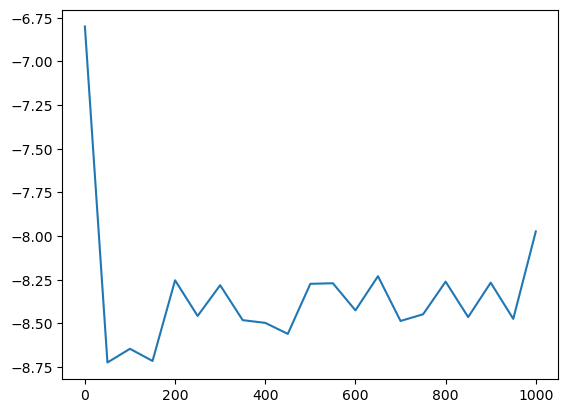

In [6]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : normal_x(x, 10, (0, 2 ** N - 1)), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
plt.plot(epochs, loss_data)
plt.show()

-8.87220573425293


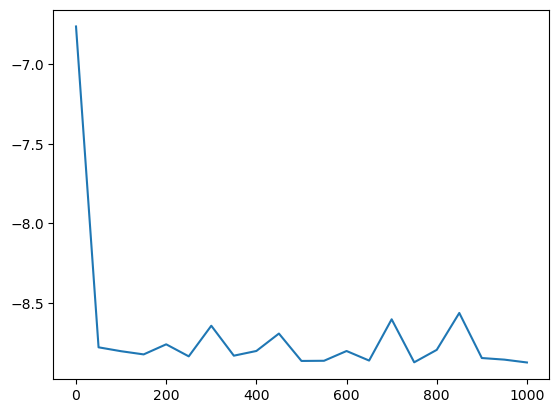

In [7]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : uniform_x(0, 2 ** N -1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
plt.plot(epochs, loss_data)
plt.show()

-8.719526290893555


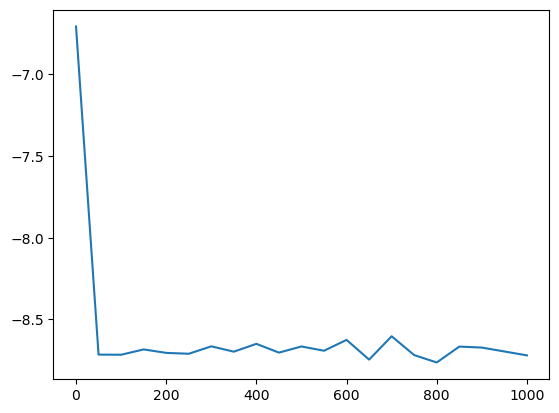

In [8]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 10), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
plt.plot(epochs, loss_data)
plt.show()

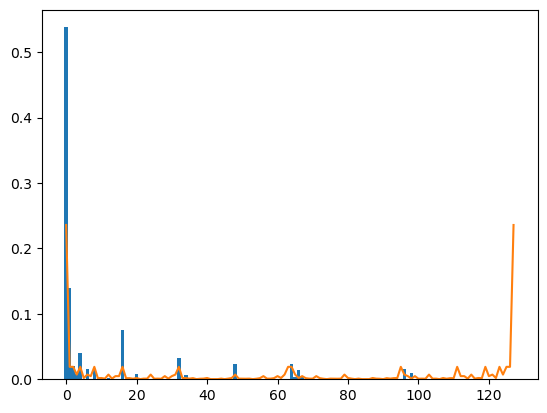

In [9]:
gs = h.eigenstates()[1][0]
gs = gs.full()
hist = plt.hist(y_pred.distribution_to_list(), density = True, bins = [-0.5 + n for n in range(0, 2 ** N + 1)])
plt.plot([n for n in range(0, 2 ** N)], [np.abs(gs[n][0]) ** 2 for n in range(0, 2 ** N)])
plt.show()